In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. Data preprocessing and Features engineering

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1-1 check data distribution

In [3]:
train_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.shape

(1460, 81)

In [7]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
test_df.shape

(1459, 80)

In [10]:
x_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']
x_test = test_df.drop('Id', axis = 1)

### 1-2 NULL, NaN value processing

In [11]:
isnull_series = train_df.isnull().sum()

print('\n NULL column and number of them \n', 
      isnull_series[isnull_series > 0].sort_values(ascending=False))


 NULL column and number of them 
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [12]:
# Remove columns with high NULL values
train_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
             , axis = 1, inplace = True)

# Replace non-drop numeric NULL columns with average values.

train_df.fillna(train_df.mean(), inplace=True)


### 1-3 Check the correlation between features

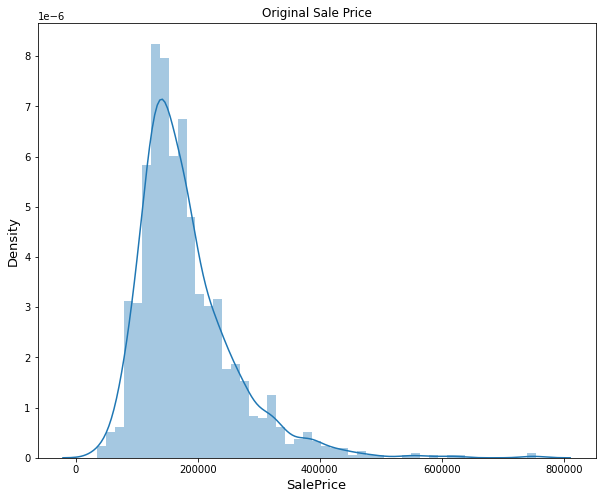

In [13]:
# target: SalePrice
plt.figure(figsize=(10,8))
plt.title('Original Sale Price')
sns.distplot(train_df['SalePrice'])
plt.ylabel('Density', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)

plt.show()

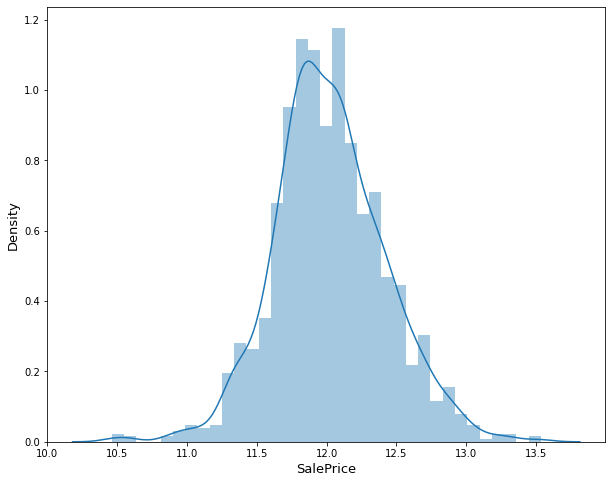

In [14]:
#log transform the target:

train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

plt.figure(figsize=(10,8))
sns.distplot(train_df['SalePrice'])
plt.ylabel('Density', fontsize=13)
plt.xlabel('SalePrice', fontsize=13)

plt.show()

<AxesSubplot:>

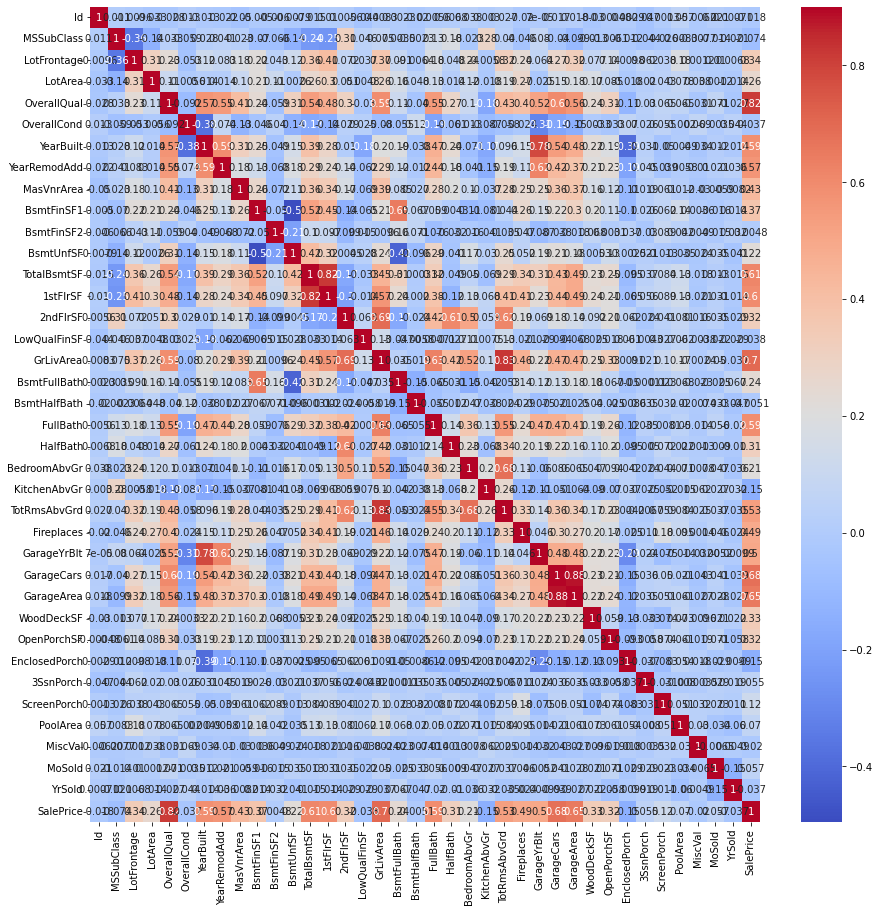

In [15]:
corr_matrix = train_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="coolwarm")

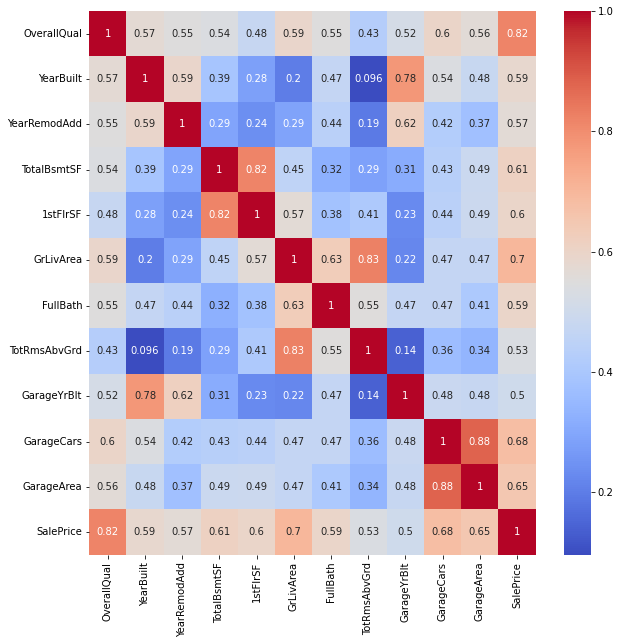

In [16]:
# most correlated features
corr_matrix = train_df.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))

g = sns.heatmap(train_df[top_corr_features].corr(),
                annot=True,
                cmap="coolwarm")


In [17]:
#Check the correlation between features

print("features highly correlated with the target")

corr_matrix = train_df.corr()

#Sort in ascending order
corr_matrix["SalePrice"].sort_values(axis=0, ascending=False)

features highly correlated with the target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489450
MasVnrArea       0.429532
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [18]:
corr_matrix = train_df.corr()

#Sort in ascending order
corr_matrix["SalePrice"].sort_values(axis=0, ascending=True)

EnclosedPorch   -0.149050
KitchenAbvGr    -0.147548
MSSubClass      -0.073959
LowQualFinSF    -0.037963
YrSold          -0.037263
OverallCond     -0.036868
MiscVal         -0.020021
Id              -0.017942
BsmtHalfBath    -0.005149
BsmtFinSF2       0.004832
3SsnPorch        0.054900
MoSold           0.057330
PoolArea         0.069798
ScreenPorch      0.121208
BedroomAbvGr     0.209043
BsmtUnfSF        0.221985
BsmtFullBath     0.236224
LotArea          0.257320
HalfBath         0.313982
2ndFlrSF         0.319300
OpenPorchSF      0.321053
WoodDeckSF       0.334135
LotFrontage      0.336156
BsmtFinSF1       0.372023
MasVnrArea       0.429532
Fireplaces       0.489450
GarageYrBlt      0.500449
TotRmsAbvGrd     0.534422
YearRemodAdd     0.565608
YearBuilt        0.586570
FullBath         0.594771
1stFlrSF         0.596981
TotalBsmtSF      0.612134
GarageArea       0.650888
GarageCars       0.680625
GrLivArea        0.700927
OverallQual      0.817185
SalePrice        1.000000
Name: SalePr

In [19]:
corr_matrix_2 = pd.DataFrame(corr_matrix.iloc[-1,:]).T

throw_away_col = []
for col in corr_matrix_2:
    if abs(corr_matrix_2[col][0]) <= 0.15:
        throw_away_col.append(col)
print(throw_away_col)

['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [20]:
# Remove features lower than 0.15

train_df.drop(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
             , axis = 1, inplace = True)

test_df.drop(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
             , axis = 1, inplace = True)


In [21]:
train_df.head(5)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,548,TA,TA,Y,0,61,WD,Normal,12.247699
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,460,TA,TA,Y,298,0,WD,Normal,12.109016
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,608,TA,TA,Y,0,42,WD,Normal,12.317171
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,642,TA,TA,Y,0,35,WD,Abnorml,11.849405
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,836,TA,TA,Y,192,84,WD,Normal,12.429220


In [22]:
test_df.head(5)

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,140,0,NaN,MnPrv,NaN,WD,Normal
1,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,393,36,NaN,NaN,Gar2,WD,Normal
2,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,212,34,NaN,MnPrv,NaN,WD,Normal
3,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,360,36,NaN,NaN,NaN,WD,Normal
4,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,...,TA,TA,Y,0,82,NaN,NaN,NaN,WD,Normal


### 1-4 Remove Outliers for 7 Features

#### 7 features with a positive correlation with "SalePrice"

OverallQual      0.817185

GrLivArea        0.700927

GarageCars       0.680625

GarageArea       0.650888

TotalBsmtSF      0.612134

1stFlrSF         0.596981

FullBath         0.594771

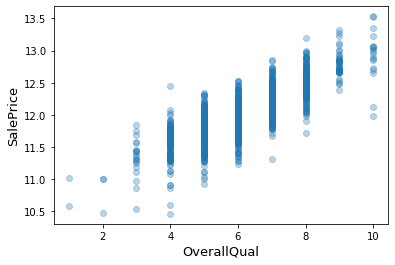

In [23]:
# ① OverallQual
fig, ax = plt.subplots()
ax.scatter(x = train_df['OverallQual'], y = train_df['SalePrice'], alpha = 0.3)
plt.xlabel('OverallQual', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

plt.show()

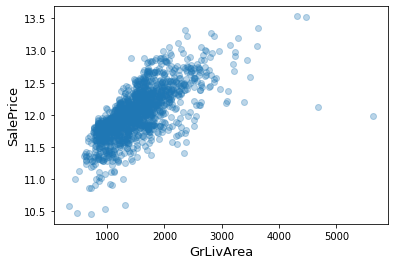

In [24]:
# ② GrLivArea
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'], alpha = 0.3)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

plt.show()

In [25]:
#Remove Outliers from 'GrLivArea'
train_df = train_df.drop(train_df[(train_df['GrLivArea']>3500) | (train_df['SalePrice']>2.65)].index)

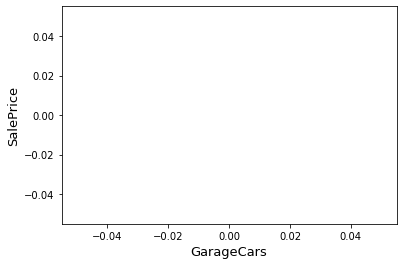

In [26]:
# ③ GarageCars

fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageCars'], y = train_df['SalePrice'], alpha = 0.3)

plt.xlabel('GarageCars', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

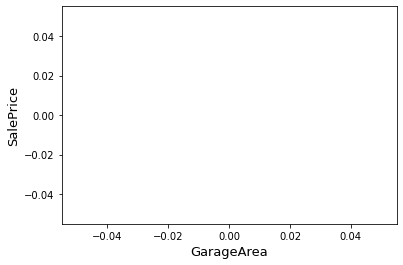

In [27]:
# ④ GarageArea

fig, ax = plt.subplots()
ax.scatter(x = train_df['GarageArea'], y = train_df['SalePrice'], alpha = 0.3)
plt.xlabel('GarageArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

plt.show()

In [28]:
#Remove Outliers from 'GarageArea'

train_df = train_df.drop(train_df[(train_df['GarageArea']>1200) | (train_df['SalePrice']>2.65)].index)

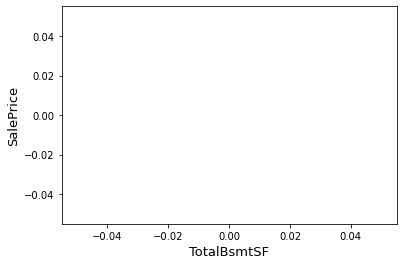

In [29]:
# ⑤ TotalBsmtSF
fig, ax = plt.subplots()
ax.scatter(x = train_df['TotalBsmtSF'], y = train_df['SalePrice'], alpha = 0.3)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)

plt.show()

In [30]:
#Remove Outliers from 'TotalBsmtSF'

train_df = train_df.drop(train_df[(train_df['TotalBsmtSF'] > 2500) | (train_df['SalePrice']>2.65)].index)

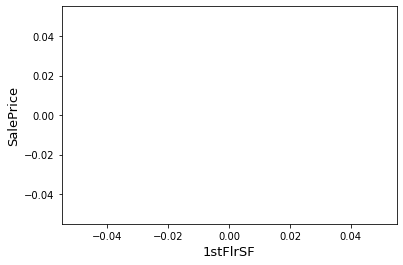

In [31]:
# ⑥ 1stFlrSF 

fig, ax = plt.subplots()
ax.scatter(x = train_df['1stFlrSF'], y = train_df['SalePrice'], alpha = 0.3)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)

plt.show()

In [32]:
#Remove Outliers from '1stFlrSF' 

train_df = train_df.drop(train_df[(train_df['1stFlrSF'] > 2500) | (train_df['SalePrice'] > 2.65)].index)

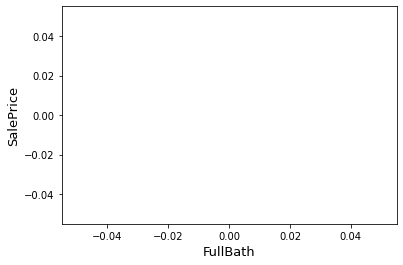

In [33]:
# ⑦ FullBath 
fig, ax = plt.subplots()
ax.scatter(x = train_df['FullBath'], y = train_df['SalePrice'], alpha = 0.3)
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('FullBath', fontsize=13)

plt.show()

In [34]:
print('data set shape', train_df.shape)

print('\nfeature type\n', train_df.dtypes.value_counts())

data set shape (0, 62)

feature type
 object     38
int64      20
float64     4
dtype: int64


# 1-5 Data scaling

In [35]:
from sklearn.model_selection import KFold

# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [36]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, train_df=train_df):
    rmse = np.sqrt(-cross_val_score(model, train_df, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [37]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

lasso = make_pipeline(RobustScaler(), 
                      Lasso(alpha =0.0005, random_state=1))


# 2. Linear regression model training, predicting, testing

Six models were selected. We will select the best model among them.

Predictions and tests using regression models have not yet been fully constructed. 

In the future, this part will be completed.

### 2-1 Light GBM

In [38]:
# Light Gradient Boosting Regressor

from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)


### 2-2 XGBoost Regressor

In [39]:
# XGBoost Regressor

from xgboost import XGBRegressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

### 2-3 Ridge regressor

In [40]:
# Ridge Regressor

from sklearn.linear_model import Ridge, RidgeCV

ridge_alphas = [1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 
                0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))


### 2-4 Support Vector Regressor 


In [41]:
# Support Vector Regressor

from sklearn.svm import SVR

svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

### 2-5 Gradient Boosting Regressor

In [42]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

### 2-6 Random Forest Regressor

In [43]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [44]:
from mlxtend.regressor import StackingCVRegressor

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)